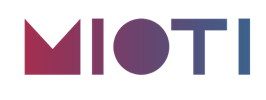
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Diego García Morate<br>diegogm@faculty.mioti.es</center>


# Challenge S2: Aprendiendo a ver en la oscuridad

## Objetivos

El objetivo de este challenge es procesar las imágenes que obtiene una camera de seguridad noctura. Aplicaremos las técnicas que conocemos de procesamiento de imagen para preprocesar las imagenes de entrada.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage.color import rgb2gray

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_histogram(img):
    from matplotlib import pyplot as plt
    n_dimensiones = len(img.shape)
    if n_dimensiones == 2: # Solo X,Y
        img_int = 255 * img.flatten()    
        plt.hist(img_int, bins = np.arange(256), color="darkgrey")
        plt.title("Gray scale histogram") 
    elif n_dimensiones == 3: # X,Y y Canal
        if img.shape[2] == 3: # R,G,B
            img_r = img[:,:,0].flatten()        
            img_g = img[:,:,1].flatten()
            img_b = img[:,:,2].flatten()
            
            if img.dtype == np.dtype('uint8'):
                plt.hist(img_r, bins = np.arange(256), color = "red") 
                plt.hist(img_g, bins = np.arange(256), color = "green")
                plt.hist(img_b, bins = np.arange(256), color = "blue")
            else:
                plt.hist(img_r, bins = np.arange(1, step=1/255), color = "red") 
                plt.hist(img_g, bins = np.arange(1, step=1/255), color = "green")
                plt.hist(img_b, bins = np.arange(1, step=1/255), color = "blue")

            plt.title("Color histogram") 
    plt.show()

## Flujo de procesamiento

### 1) En este primer paso carga la imagen (`"img/1.jpg"`) en memoria:

In [3]:
img = io.imread("img/1.jpg")

### 2) ¿Qué dimensiones tiene? ¿En qué espacio de color está?

In [4]:
img.shape

(2848, 4256, 3)

### 3) Muestra la imagen en pantalla:

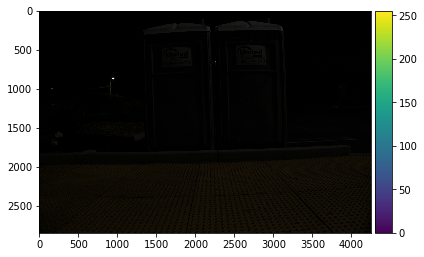

In [5]:
io.imshow(img)
io.show()

### 4) ¿Qué se ve en la imagen?

No se ve prácticamente nada; no hay nitidez ni claridad en la imagen seleccionada.

### 5) Dibuja el histograma y describe la imagen mediante el histograma.

In [6]:
def plot_histogram(img):
    from matplotlib import pyplot as plt
    n_dimensiones = len(img.shape)
    if n_dimensiones == 2: # Solo X,Y
        img_int = 255 * img.flatten()    
        plt.hist(img_int, bins = np.arange(256), color="darkgrey")
        plt.title("Gray scale histogram") 
    elif n_dimensiones == 3: # X,Y y Canal
        if img.shape[2] == 3: # R,G,B
            img_r = img[:,:,0].flatten()        
            img_g = img[:,:,1].flatten()
            img_b = img[:,:,2].flatten()
            
            if img.dtype == np.dtype('uint8'):
                plt.hist(img_r, bins = np.arange(256), color = "red") 
                plt.hist(img_g, bins = np.arange(256), color = "green")
                plt.hist(img_b, bins = np.arange(256), color = "blue")
            else:
                plt.hist(img_r, bins = np.arange(1, step=1/255), color = "red") 
                plt.hist(img_g, bins = np.arange(1, step=1/255), color = "green")
                plt.hist(img_b, bins = np.arange(1, step=1/255), color = "blue")

            plt.title("Color histogram") 
    plt.show()

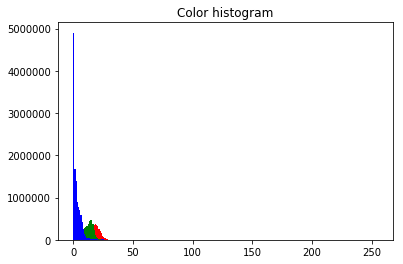

In [7]:
plot_histogram(img)

### 6) ¿Se te ocurre alguna manera de mejorar la imagen?

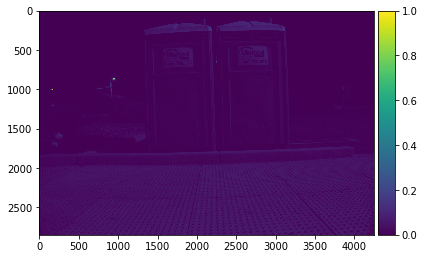

In [8]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img)
io.imshow(img_gray)
io.show()

In [9]:
from skimage import exposure

img_equalized = exposure.equalize_hist(img)

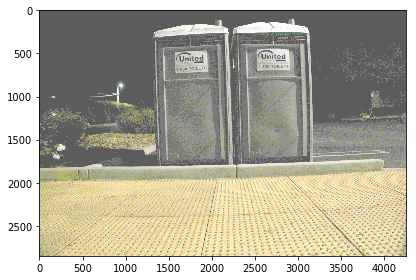

In [10]:
io.imshow(img_equalized)
io.show()


### 7) ¿Puedes describir el histograma de la imagen resultante?

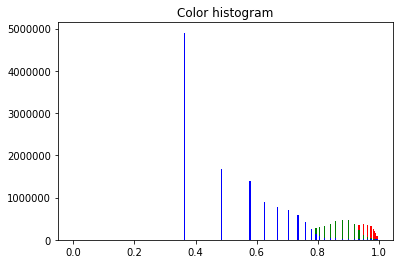

In [11]:
plot_histogram(img_equalized)

### 8) Obten la imagen de bordes 

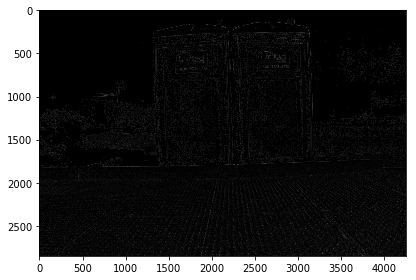

In [12]:
from skimage.filters import sobel

edge_sobel = sobel(rgb2gray(img_equalized))
io.imshow(edge_sobel)
io.show()

### 9) ¿Se te ocurre alguna manera de mejorarlo?

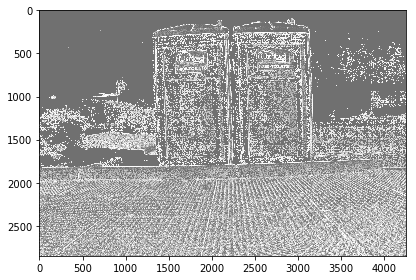

In [13]:
#from skimage filters import sobel

edge_sobel_eq = exposure.equalize_hist(edge_sobel)
io.imshow(edge_sobel_eq)
io.show()

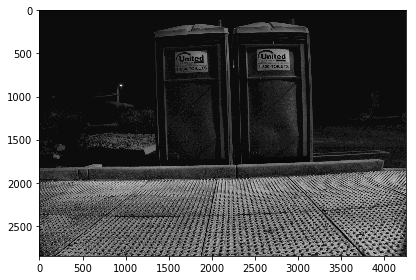

In [14]:
#ecualizamos
border_equalizer = exposure.equalize_adapthist(img_gray, clip_limit=0.05)
io.imshow(border_equalizer)
io.show()

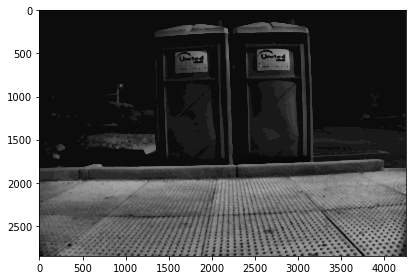

In [15]:
# filtro de mediana

from skimage.filters import median
from skimage.morphology import disk


img_median = median(border_equalizer, disk(15))
io.imshow(img_median)
io.show()

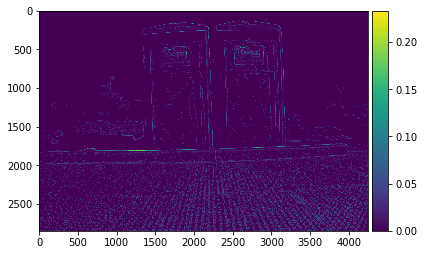

In [16]:

from skimage.filters import sobel

edge = sobel(img_median)
io.imshow(edge)
io.show()

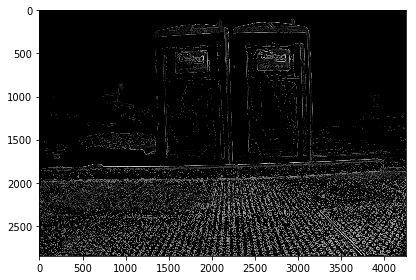

In [17]:
#por ultimo, ecualizamos los bordes para sacarlos más claros.
border = exposure.equalize_adapthist(edge, clip_limit=0.05)
io.imshow(border)
io.show()

### 10) ¿Podrías describir un pipeline típico de trabajo?. Con lo que ya sabes reordena los pasos anteriores y describe como obtendrías una buena imagen de bordes.

Cargar, se aplica una mediana para reducir el ruido, se ecualiza y se obtiene los bordes. Después, se decide si se vuelve a ecualizar o no